<a href="https://colab.research.google.com/github/kylevirtuous1211/GenAI-Practice/blob/main/HW2_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model_checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/checkpoints/MNIST_checkpoint.pth'

Mounted at /content/drive


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
# Assuming MNIST dataset is already downloaded
mnist_dataset = MNIST(root='./data', train=True, download=True, transform=transform)

train_loader = DataLoader(dataset=mnist_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=mnist_dataset, batch_size=64)

### Creating the model architecture

In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(1, 32, 3, 1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 3, 1),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(36864, 10)
    )
  def forward(self, x):
    return self.net(x)

### Model training:
Trained the model using 10 epochs. Because is a multi-label classification problem so I use cross entropy loss. Also, used Adam optimizer for better weight updates.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MyModel()
mode = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    data = data.to(device=device)
    targets = targets.to(device=device)

    scores = model(data)
    loss = criterion(scores, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
     # Print progress (optional)
    if batch_idx % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")

Epoch [1/10], Batch [0/938], Loss: 2.3053
Epoch [1/10], Batch [100/938], Loss: 0.1332
Epoch [1/10], Batch [200/938], Loss: 0.0544
Epoch [1/10], Batch [300/938], Loss: 0.0555
Epoch [1/10], Batch [400/938], Loss: 0.1037
Epoch [1/10], Batch [500/938], Loss: 0.0434
Epoch [1/10], Batch [600/938], Loss: 0.0371
Epoch [1/10], Batch [700/938], Loss: 0.0514
Epoch [1/10], Batch [800/938], Loss: 0.0806
Epoch [1/10], Batch [900/938], Loss: 0.1805
Epoch [2/10], Batch [0/938], Loss: 0.0195
Epoch [2/10], Batch [100/938], Loss: 0.0073
Epoch [2/10], Batch [200/938], Loss: 0.0177
Epoch [2/10], Batch [300/938], Loss: 0.0300
Epoch [2/10], Batch [400/938], Loss: 0.0959
Epoch [2/10], Batch [500/938], Loss: 0.0123
Epoch [2/10], Batch [600/938], Loss: 0.0366
Epoch [2/10], Batch [700/938], Loss: 0.0519
Epoch [2/10], Batch [800/938], Loss: 0.0991
Epoch [2/10], Batch [900/938], Loss: 0.0482
Epoch [3/10], Batch [0/938], Loss: 0.0109
Epoch [3/10], Batch [100/938], Loss: 0.0040
Epoch [3/10], Batch [200/938], Loss: 0

In [ ]:
def evaluate_mnist_model(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode

    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in data_loader:
            data = data.to(device)
            targets = targets.to(device)

            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)

            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total

    print(f"Evaluation Accuracy: {accuracy:.2f}%")

    return accuracy
accuracy = evaluate_mnist_model(model, test_loader, device)
print(accuracy)

Evaluation Accuracy: 99.90%
99.89833333333333


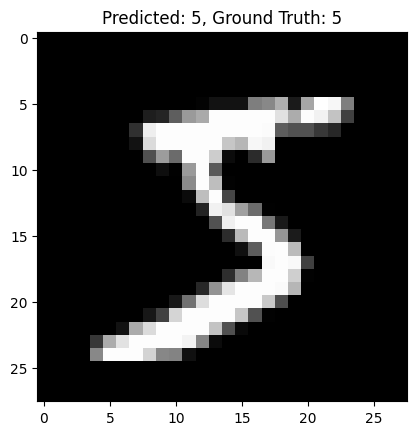

In [ ]:
data, targets = next(iter(test_loader))

image = data[0].numpy().squeeze()
label = targets[0].item()

model.eval()
with torch.no_grad():
  output = model(data[0].unsqueeze(0).to(device))
  _, predicted = torch.max(output.data, 1)
  predicted_label = predicted.item()

# Display the image, predicted label, and ground truth label
plt.imshow(image, cmap='gray')
plt.title(f"Predicted: {predicted_label}, Ground Truth: {label}")
plt.show()
